In [2]:
import pandas as pd
!pip install pandas_profiling
!pip install sweetviz


In [3]:
import pandas_profiling as ppf
import sweetviz as swt

In [6]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
delivery = pd.read_csv("C:\\Users\\91770\\Downloads\\delivery_time.csv")
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
eda_report = ppf.ProfileReport(delivery)
eda_report.to_file(output_file='deliver.html')

In [7]:
delivery[delivery.duplicated()]

,Delivery Time,Sorting Time


In [8]:
data= delivery.rename({'Delivery Time' : 'deliverytime','Sorting Time': 'sortingtime' },axis=1)

In [9]:
data

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:>

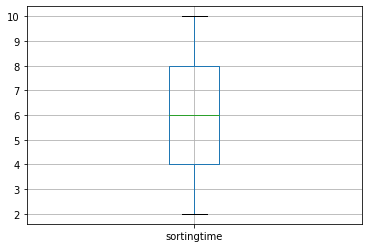

In [10]:
data.boxplot(column=['sortingtime'])

In [11]:
import numpy as np
x= np.log(data.deliverytime)
y = np.log(data.sortingtime)
plt.scatter(x,y)
plt.xlabel("Sorting Time")
plt.ylabel("Delivert TIme")

NameError: name 'plt' is not defined

In [12]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\91770\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

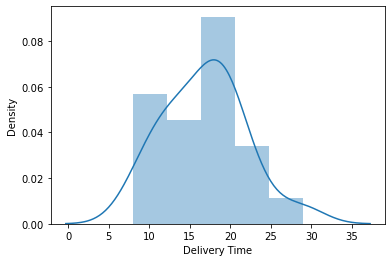

In [13]:
import seaborn as sns
import numpy as np

sns.distplot(delivery["Delivery Time"])
 

C:\Users\91770\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

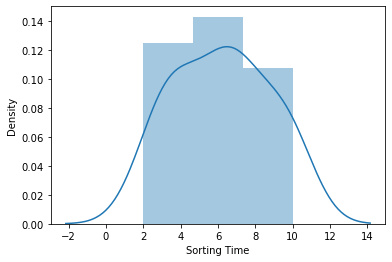

In [14]:
sns.distplot(delivery["Sorting Time"])

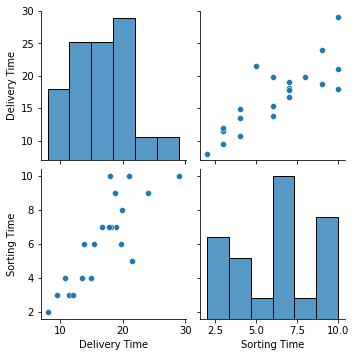

In [15]:
sns.pairplot(delivery)

In [16]:
import statsmodels.formula.api as smf
model = smf.ols("deliverytime~sortingtime",data= data).fit()


In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           3.98e-06
Time:                        23:11:18   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
pred = model.predict(data.sortingtime)
pred


0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [19]:
error = data.deliverytime - pred
error.mean()

-6.767073673905716e-16

<AxesSubplot:xlabel='deliverytime', ylabel='sortingtime'>

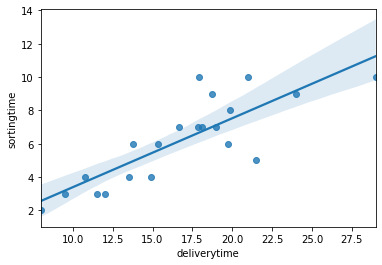

In [29]:
sns.regplot(x='deliverytime',y='sortingtime',data=data)

In [ ]:
model.rsquared

In [ ]:
new_data =pd.Series([10])
data_pred = pd.DataFrame(new_data,columns=['sortingtime'])
model.predict(data_pred)

In [231]:
import numpy as np
data['log_deliverytime'] = np.log(data.deliverytime)
data['log_sortingtime'] = np.log(data.sortingtime)
data['sort_sq'] = data.sortingtime*data.sortingtime
data



,deliverytime,sortingtime,log_deliverytime,log_sortingtime,sort_sq
0,21.00,10,3.044522,2.302585,100
1,13.50,4,2.602690,1.386294,16
2,19.75,6,2.983153,1.791759,36
3,24.00,9,3.178054,2.197225,81
4,29.00,10,3.367296,2.302585,100
5,15.35,6,2.731115,1.791759,36
6,19.00,7,2.944439,1.945910,49
7,9.50,3,2.251292,1.098612,9
8,17.90,10,2.884801,2.302585,100
9,18.75,9,2.931194,2.197225,81


In [32]:
import statsmodels.formula.api as smf
model_log = smf.ols("deliverytime~log_sortingtime",data=data).fit() 

In [33]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           2.64e-06
Time:                        23:12:09   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1597      2.455      0.472      0.642      -3.978       6.297
log_sortingtime     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
import statsmodels.formula.api as smf
model_exp = smf.ols("log_deliverytime~sortingtime",data= data).fit()

In [35]:
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_deliverytime   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           1.59e-06
Time:                        23:12:10   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
sortingtime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
model_quad = smf.ols("deliverytime~log_sortingtime+sort_sq",data=data).fit()

In [177]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     20.88
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           2.04e-05
Time:                        23:33:53   Log-Likelihood:                -50.796
No. Observations:                  21   AIC:                             107.6
Df Residuals:                      18   BIC:                             110.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.7488      4.338      0.634      0.534      -6.366      11.864
log_sortingtime     7.5029      3.707      2.024      0.058      -0.286      15.292
sort_sq             0.0241      0.054      0.449      0.659      -0.089       0.137
==============================================================================
Omnibus:                        4.692   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                2.842
Skew:                           0.867   Prob(JB):                        0.241
Kurtosis:                       3.494   Cond. No.                         482.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='log_sortingtime', ylabel='log_deliverytime'>

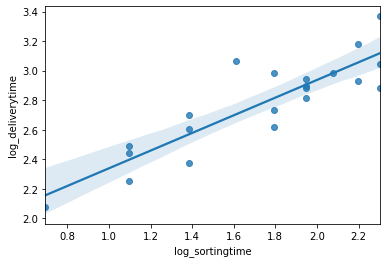

In [55]:
sns.regplot(x='log_sortingtime',y='log_deliverytime',data=data)

In [56]:
def RMSE(actual,pred):
    temp = np.sqrt(np.mean((actual-pred)*(actual-pred)))
    return temp

In [57]:
pred_basic = model.predict(data)
RMSE_basic= RMSE(data.deliverytime,pred_basic)
RMSE_basic

2.7916503270617654

In [58]:
pred_log = model_log.predict(data)
RMSE_log = RMSE(data.deliverytime,pred_log)
RMSE_log

2.733171476682066

In [59]:
pred_exp = np.exp(model_exp.predict(data))
RMSE_exp = RMSE(data.deliverytime,pred_exp)
RMSE_exp

2.940250323056201

In [179]:
pred_quad=(model_quad.predict(data))
RMSE_quad = RMSE(data.deliverytime,pred_quad)
RMSE_quad

2.7180007904142376

In [61]:
dict = {"model":["basic","log","exp","quad"],"RMSE":[RMSE_basic,RMSE_log,RMSE_exp,RMSE_quad],"AIC":[model.aic,model_log.aic,model_exp.aic,model_quad.aic]}

In [62]:
rmse_table = pd.DataFrame(dict)
rmse_table

,model,RMSE,AIC
0,basic,2.791650,106.714002
1,log,2.733171,105.824850
2,exp,2.940250,-11.583930
3,quad,2.718001,107.591076


Therefore, the model which has log tranformation to delivery_time is the best fitted model[as the RMSE & aic values are less compared to other models.

In [136]:
newdata = pd.Series([10,6])

In [246]:
data_pred = pd.DataFrame(newdata,columns=["sortingtime"])

#data_pred["sort_sq"] = (data_pred.log_sortingtime*data_pred.log_sortingtime)
np.exp(model_exp.predict(data_pred))


0    23.972032
1    15.716034
dtype: float64